# COMPAS Data Analysis

In [28]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# Create your connection.
cnx = sqlite3.connect('/Users/dns43/Downloads/compas.db')

df = pd.read_sql_query("SELECT * FROM compas", cnx)
df = df.drop_duplicates()
df.head()
df2 = pd.read_csv('/Users/dns43/Downloads/compas-analysis-master/compas-scores.csv')
df3 = pd.read_csv('/Users/dns43/Downloads/compas-analysis-master/cox-parsed.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 37578 entries, 0 to 37577
Data columns (total 21 columns):
id                            37578 non-null int64
first                         37578 non-null object
last                          37578 non-null object
compas_person_id              37578 non-null int64
compas_case_id                37578 non-null int64
compas_assessment_id          37578 non-null int64
agency_text                   37578 non-null object
scale_set                     37578 non-null object
assessment_reason             37578 non-null object
legal_status                  37578 non-null object
custody_status                37578 non-null object
marital_status                37578 non-null object
screening_date                37578 non-null object
rec_supervision_level         37578 non-null int64
rec_supervision_level_text    37578 non-null object
score_text                    37578 non-null object
scale_id                      37578 non-null int64
type_of_asses

In [29]:
df.head(9)

,id,first,last,compas_person_id,compas_case_id,compas_assessment_id,agency_text,scale_set,assessment_reason,legal_status,...,marital_status,screening_date,rec_supervision_level,rec_supervision_level_text,score_text,scale_id,type_of_assessment,raw_score,decile_score,person_id
0,1,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,7,Risk of Violence,-4.31,1,1
1,2,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-2.78,1,1
2,3,miguel,hernandez,56418,58393,64352,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-08-14 00:00:00.000000,1,Low,Low,18,Risk of Failure to Appear,13.00,1,1
3,4,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Low,7,Risk of Violence,-2.75,2,2
4,5,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Medium,8,Risk of Recidivism,-0.34,5,2
5,6,michael,ryan,68603,72042,79669,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2014-12-31 00:00:00.000000,1,Low,Low,18,Risk of Failure to Appear,16.00,2,2
6,7,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Low,7,Risk of Violence,-3.07,1,3
7,8,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Low,8,Risk of Recidivism,-0.76,3,3
8,9,kevon,dixon,51601,52796,58102,PRETRIAL,Risk and Prescreen,Intake,Pretrial,...,Single,2013-01-27 00:00:00.000000,1,Low,Medium,18,Risk of Failure to Appear,25.00,6,3


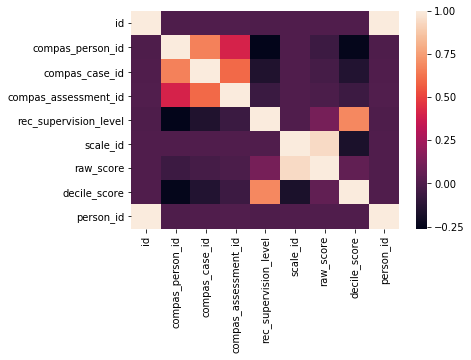

In [30]:
#df.custody_status.describe().unique()
#df.custody_status.value_counts() # Inmate, Pretrial, Defendant, ... 6 total
#df.scale_id.value_counts() #assesment type spexcific
df.rec_supervision_level.value_counts() #1,2,3,4
#df.rec_supervision_level_text.value_counts() matching rec_supervision_level (Low, Med, Med w/ Override considerartion high)
#df.raw_score.value_counts() # 650 total, highest frequency betweetn 15 and 30 ????
#df.screening_date.value_counts()

corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 47 columns):
id                         11757 non-null int64
name                       11757 non-null object
first                      11757 non-null object
last                       11757 non-null object
compas_screening_date      11757 non-null object
sex                        11757 non-null object
dob                        11757 non-null object
age                        11757 non-null int64
age_cat                    11757 non-null object
race                       11757 non-null object
juv_fel_count              11757 non-null int64
decile_score               11757 non-null int64
juv_misd_count             11757 non-null int64
juv_other_count            11757 non-null int64
priors_count               11757 non-null int64
days_b_screening_arrest    10577 non-null float64
c_jail_in                  10577 non-null object
c_jail_out                 10577 non-null object
c_case_number  

In [32]:
df2.is_recid.value_counts()
df2.is_violent_recid.value_counts()

0    10875
1      882
Name: is_violent_recid, dtype: int64

In [33]:
#df.loc[df['first'].isin(['miguel'])]
tmp = df2.loc[df2['is_recid']==1]#.count()#.isin(['1'])].count()
tmp.count()
tmp = tmp.loc[tmp['is_violent_recid']==1]
tmp.count()

id                         882
name                       882
first                      882
last                       882
compas_screening_date      882
sex                        882
dob                        882
age                        882
age_cat                    882
race                       882
juv_fel_count              882
decile_score               882
juv_misd_count             882
juv_other_count            882
priors_count               882
days_b_screening_arrest    864
c_jail_in                  864
c_jail_out                 864
c_case_number              878
c_offense_date             728
c_arrest_date              150
c_days_from_compas         878
c_charge_degree            882
c_charge_desc              878
is_recid                   882
num_r_cases                  0
r_case_number              882
r_charge_degree            882
r_days_from_arrest         646
r_offense_date             882
r_charge_desc              881
r_jail_in                  646
r_jail_o


# I conclude that only 'recid' inmates can be 'violent_recid'



In [34]:
tmp = df2.loc[df2['c_jail_in'] > df2['r_jail_in']]
tmp.count()

id                         168
name                       168
first                      168
last                       168
compas_screening_date      168
sex                        168
dob                        168
age                        168
age_cat                    168
race                       168
juv_fel_count              168
decile_score               168
juv_misd_count             168
juv_other_count            168
priors_count               168
days_b_screening_arrest    168
c_jail_in                  168
c_jail_out                 168
c_case_number              168
c_offense_date             110
c_arrest_date               58
c_days_from_compas         168
c_charge_degree            168
c_charge_desc              167
is_recid                   168
num_r_cases                  0
r_case_number              168
r_charge_degree            168
r_days_from_arrest         168
r_offense_date             168
r_charge_desc              167
r_jail_in                  168
r_jail_o

# Some seem to manage to get in jail again before they even got out... parole?

In [35]:
tmp = df2.loc[df2['r_offense_date'].isna()] == True#.value_counts()
tmp = tmp.loc[tmp['is_recid']==0]
tmp.count()

id                         8054
name                       8054
first                      8054
last                       8054
compas_screening_date      8054
sex                        8054
dob                        8054
age                        8054
age_cat                    8054
race                       8054
juv_fel_count              8054
decile_score               8054
juv_misd_count             8054
juv_other_count            8054
priors_count               8054
days_b_screening_arrest    8054
c_jail_in                  8054
c_jail_out                 8054
c_case_number              8054
c_offense_date             8054
c_arrest_date              8054
c_days_from_compas         8054
c_charge_degree            8054
c_charge_desc              8054
is_recid                   8054
num_r_cases                8054
r_case_number              8054
r_charge_degree            8054
r_days_from_arrest         8054
r_offense_date             8054
r_charge_desc              8054
r_jail_i

# If a person has no r_charge_degree, she is not recid (0 or n/a)

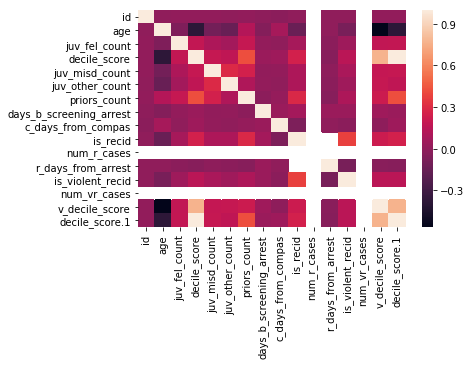

In [36]:
corr = df2.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [37]:
df2.head(10)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,vr_offense_date,vr_charge_desc,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,type_of_assessment,decile_score.1,score_text,screening_date
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-08-14,Risk of Recidivism,1,Low,2013-08-14
1,2,michael ryan,michael,ryan,2014-12-31,Male,1985-02-06,31,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-12-31,Risk of Recidivism,5,Medium,2014-12-31
2,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,2013-07-05,Felony Battery (Dom Strang),Risk of Violence,1,Low,2013-01-27,Risk of Recidivism,3,Low,2013-01-27
3,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,NaN,NaN,Risk of Violence,3,Low,2013-04-14,Risk of Recidivism,4,Low,2013-04-14
4,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,NaN,NaN,Risk of Violence,6,Medium,2013-01-13,Risk of Recidivism,8,High,2013-01-13
5,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-03-26,Risk of Recidivism,1,Low,2013-03-26
6,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,NaN,NaN,Risk of Violence,1,Low,2013-11-30,Risk of Recidivism,1,Low,2013-11-30
7,8,edward riddle,edward,riddle,2014-02-19,Male,1974-07-23,41,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,2,Low,2014-02-19,Risk of Recidivism,6,Medium,2014-02-19
8,9,steven stewart,steven,stewart,2013-08-30,Male,1973-02-25,43,25 - 45,Other,...,NaN,NaN,Risk of Violence,3,Low,2013-08-30,Risk of Recidivism,4,Low,2013-08-30
9,10,elizabeth thieme,elizabeth,thieme,2014-03-16,Female,1976-06-03,39,25 - 45,Caucasian,...,NaN,NaN,Risk of Violence,1,Low,2014-03-16,Risk of Recidivism,1,Low,2014-03-16


In [41]:
AA = df2[(df2['race'] == 'African-American')]
aa_total = AA.count()[1]
AA = AA[(AA['is_recid'] == 1.0)]
AA = AA[(AA['decile_score'] < 5)]
aa_fp = AA.count()[1]
print(aa_fp, aa_total)

C = df2[(df2['race'] == 'Caucasian')]
c_total = C.count()[1]
C = C[(C['is_recid'] == 1.0)]
C = C[(C['decile_score'] < 5)]
c_fp = C.count()[1]
print(c_fp, c_total)

print('False-Positive Rate for African-American: ', aa_fp/aa_total, 'vs Caucasian: ', c_fp/c_total)
print('=> gap of ', 1-((aa_fp/aa_total)/(c_fp/c_total)) )

632 5813
539 4085
False-Positive Rate for African-American:  0.10872183038018235 vs Caucasian:  0.13194614443084454
=> gap of  0.17601358607969397


# This must be the 18% False Positive mentioned in the paper

In [11]:
df2 = df2.loc[df2['race'].isin(['African-American', 'Caucasian'])]
df2 = df2[['c_charge_degree', 'race', 'sex', 'is_recid', 'age', 'priors_count', 'juv_fel_count', 'juv_misd_count', 'juv_other_count']]
df2['age'] = df2['age']/100
df2['priors_count'] = df2['priors_count']/df2['priors_count'].max()
a,_= pd.factorize(df2['sex'])
df2['sex'] = a
a,_= pd.factorize(df2['c_charge_degree'])
df2['c_charge_degree'] = a
for i in df2:
    print(df2[i].value_counts(),'\n')

1    6200
2    3093
0     605
Name: c_charge_degree, dtype: int64 

African-American    5813
Caucasian           4085
Name: race, dtype: int64 

0    7814
1    2084
Name: sex, dtype: int64 

 0    6055
 1    3264
-1     579
Name: is_recid, dtype: int64 

0.26    465
0.24    454
0.22    442
0.25    441
0.27    436
0.23    424
0.21    423
0.29    397
0.28    372
0.30    365
0.31    338
0.32    294
0.33    292
0.34    286
0.20    275
0.35    244
0.36    238
0.37    225
0.39    200
0.38    199
0.41    164
0.44    164
0.43    163
0.42    162
0.51    155
0.49    152
0.40    149
0.50    145
0.52    145
0.45    143
       ... 
0.55    112
0.54    108
0.57     91
0.58     84
0.59     72
0.19     60
0.60     58
0.61     57
0.62     35
0.63     34
0.65     32
0.64     28
0.66     26
0.67     24
0.69     22
0.68     14
0.71     10
0.70      9
0.77      7
0.18      6
0.72      6
0.75      6
0.74      5
0.73      3
0.78      3
0.76      2
0.86      1
0.80      1
0.83      1
0.79      1
Name: age, Le

In [12]:
df2.head(10)

,c_charge_degree,race,sex,is_recid,age,priors_count,juv_fel_count,juv_misd_count,juv_other_count
1,0,Caucasian,0,-1,0.31,0.000000,0,0,0
2,1,African-American,0,1,0.34,0.000000,0,0,0
3,1,African-American,0,1,0.24,0.093023,0,0,1
4,1,African-American,0,0,0.23,0.023256,0,1,0
7,1,Caucasian,0,1,0.41,0.325581,0,0,0
9,2,Caucasian,1,0,0.39,0.000000,0,0,0
10,1,Caucasian,0,0,0.20,0.000000,0,0,1
11,1,Caucasian,1,0,0.26,0.000000,0,0,0
12,1,Caucasian,0,1,0.21,0.023256,0,0,0
13,1,Caucasian,0,0,0.27,0.000000,0,0,0


In [13]:
#df2['is_recid'] = df2.loc[df2['is_recid'] == -1, 'is_recid'] = 0
#df2.head()
print(df2.is_recid.value_counts())

df2['is_recid'] = df2['is_recid'].replace(-1, 0)
df2.race.value_counts()
df2.is_recid.value_counts()
#asd.head()
#asd['is_recid'] = asd.loc[df2['is_recid'] == -1 ] = 0


 0    6055
 1    3264
-1     579
Name: is_recid, dtype: int64


0    6634
1    3264
Name: is_recid, dtype: int64

In [14]:
df2.race.value_counts()

African-American    5813
Caucasian           4085
Name: race, dtype: int64

In [15]:
#print(df2.race.value_counts())
#df2.loc[df2['is_recid'] == -1 ].count()
#df2.loc[df2['is_recid'] == 0 ].count()
#df2.loc[df2['is_recid'] == -1 ] = 0#.value_counts()
#tmp = tmp.loc[tmp['is_recid']==0]
#dfs.count()
#print(df2.race.value_counts())
#df2.loc[df2['race'] == "African-American" ] = 0
#df2.loc[df2['race'] == "Caucasian" ] = 1
#print(df2.race.value_counts())

In [16]:
df2.juv_fel_count.value_counts()

0     9512
1      254
2       73
3       29
4       15
5        7
6        2
10       2
8        2
13       1
9        1
Name: juv_fel_count, dtype: int64

In [17]:
a,_= pd.factorize(df2['race'])
df2['race'] = a
print(df2.race.value_counts())
training_features = df2.sample(frac=0.8,random_state=0)
test_features = df2.drop(training_features.index)

training_label = pd.get_dummies(training_features['is_recid'])
training_features.pop('is_recid')

test_label = pd.get_dummies(test_features['is_recid'])
test_features.pop('is_recid')
dtest_label = pd.get_dummies(test_features['race'])
training_features.head(10)

1    5813
0    4085
Name: race, dtype: int64


,c_charge_degree,race,sex,age,priors_count,juv_fel_count,juv_misd_count,juv_other_count
7926,1,1,0,0.60,0.000000,0,0,0
6825,1,0,1,0.36,0.000000,0,0,0
7496,1,1,0,0.20,0.000000,0,0,0
5978,1,1,0,0.39,0.046512,0,0,0
9840,1,1,0,0.28,0.069767,0,0,0
5997,1,1,0,0.38,0.023256,0,0,0
10074,1,0,0,0.36,0.046512,0,0,0
6508,2,1,1,0.44,0.000000,0,0,0
1621,1,1,0,0.53,0.046512,0,0,0
3018,2,0,0,0.50,0.000000,0,0,0


In [18]:
training_features.count()

c_charge_degree    7918
race               7918
sex                7918
age                7918
priors_count       7918
juv_fel_count      7918
juv_misd_count     7918
juv_other_count    7918
dtype: int64

In [19]:
type(training_features)

pandas.core.frame.DataFrame

In [20]:
training_features = training_features.values
#training_features = np.reshape(training_features, [len(training_features),2])
training_label = training_label.values
training_label = np.reshape(training_label, [len(training_label),2])
test_label = test_label.values
test_label = np.reshape(test_label, [len(test_label),2])

In [21]:
learning_rate = 0.0184
batch_size = 256
num_steps = int(len(training_label) / batch_size)
display_step = int(num_steps / 10)

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 8 # MNIST data input (img shape: 28*28)
num_classes = 2 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    #layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    prob = tf.nn.sigmoid(out_layer)
    return out_layer, prob


# Construct model
logits, rprob = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
prediction = tf.argmax(logits, 1)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    #train = sess.
    #run(training_features)
    #train_labels = sess.run(training_labels)
    #test = sess.run(test_features)
    #test_labels = sess.run(test_labels)
    
    logit_output = []
    #prediction_output = []

    start = 0
    for step in range(1, num_steps+1):
        #batch_x, batch_y = training_data.next_batch(batch_size)
        # Run optimization op (backprop)
        start = start+batch_size
        end = start+batch_size
        
        sess.run(train_op, feed_dict={X: training_features[start:end], Y: training_label[start:end]})
        logit_output.append(sess.run(logits, feed_dict={X: training_features[start:end], Y: training_label[start:end]}))
        #prediction_output.append(sess.run(prediction, feed_dict={X: training_features[start:end], Y: training_label[start:end]}))
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: training_features[start:end],
                                                                 Y: training_label[start:end]})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: test_features,
                                      Y: test_label}))
    prediction_output = sess.run(prediction, feed_dict={X: test_features, Y: test_label})
        

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 165.0425, Training Accuracy= 0.715
Step 3, Minibatch Loss= 191.9223, Training Accuracy= 0.633
Step 6, Minibatch Loss= 113.8320, Training Accuracy= 0.418
Step 9, Minibatch Loss= 25.4923, Training Accuracy= 0.637
Step 12, Minibatch Loss= 75.4112, Training Accuracy= 0.723
Step 15, Minibatch Loss= 27.0830, Training Accuracy= 0.707
Step 18, Minibatch Loss= 50.4199, Training Accuracy= 0.430
Step 21, Minibatch Loss= 30.9116, Training Accuracy= 0.738
Step 24, Minibatch Loss= 11.3547, Training Accuracy= 0.656
Step 27, Minibatch Loss= 10.2607, Training Accuracy= 0.684
Step 30, Minibatch Loss= 13.0920, Training Accuracy= 0.639
Optimization Finished!
Testing Accuracy: 0.679798


In [22]:
prediction_output
p = pd.DataFrame(prediction_output, columns=['p'])
p = pd.get_dummies(p['p'])

In [23]:
r = pd.DataFrame(test_label, columns=['is_recid0', 'is_recid1'])
d = pd.DataFrame(dtest_label.values, columns=['African-American', 'Caucasian'])
a = p.values
p = pd.DataFrame(a, columns=['p0', 'p1'])

In [25]:

dataset = pd.concat([r, d, p], axis=1, join_axes=[test_features.index])
dataset.head()

,is_recid0,is_recid1,African-American,Caucasian,p0,p1
1,1.0,0.0,0.0,1.0,1.0,0.0
17,0.0,1.0,0.0,1.0,0.0,1.0
26,1.0,0.0,1.0,0.0,1.0,0.0
31,0.0,1.0,0.0,1.0,0.0,1.0
33,1.0,0.0,0.0,1.0,1.0,0.0


In [42]:
AA = dataset[['African-American', 'is_recid0','p1']]
C = dataset[['Caucasian', 'is_recid0','p1']]
#'African-American', 'is_recid0','p'
#df[ (df['A']>0) & (df['B']>0) & (df['C']>0)]
#AA.all(1.0)
#AA[ ((AA['African-American'] == 1.0) ^ (AA['is_recid0'] == 1.0) ^ (AA['p'] == 1.0)).all() ]
AA = AA[(AA['African-American'] == 1.0)]
aa_total = AA.count()[1]
AA = AA[(AA['is_recid0'] == 1.0)]
AA = AA[(AA['p1'] == 1.0)]
aa_fp = AA.count()[1]
print(aa_fp)

C = C[(C['Caucasian'] == 1.0)]
c_total = C.count()[1]
C = C[(C['is_recid0'] == 1.0)]
C = C[(C['p1'] == 1.0)]
c_fp = C.count()[1]
print(c_fp)

print('False-Positive Rate for African-American: ', aa_fp/aa_total, 'vs Caucasian: ', c_fp/c_total)
print('=> gap of ', 1-((aa_fp/aa_total)/(c_fp/c_total)) )

20
29
False-Positive Rate for African-American:  0.13986013986013987 vs Caucasian:  0.15675675675675677
=> gap of  0.10778876296117679
